In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import datetime
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import get_sun, EarthLocation, AltAz

from library import gen_lib as gl

/home/w2naf/code/sept2017/workflows/solar_zenith/library/gen_lib.py:6: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')
/home/w2naf/code/sept2017/workflows/solar_zenith/library/omni.py:10: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')
/home/w2naf/code/sept2017/workflows/solar_zenith/library/symh.py:9: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')
/home/w2naf/code/sept2017/workflows/solar_zenith/library/select_histograms.py:7: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')
/home/w2naf/code/sept2017/workflows/solar_zenith/library/visualize_histograms.py:9: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  mpl.use('Agg')
/home/w2naf/code/sept2017/workflows/solar_zenith/library/goes.py:43: UserWarning: matplotlib.py

In [2]:
class SolarZenith(object):
    def __init__(self,sTime,eTime,lon=-100,lat=40,tstep='1M'):
        dt = pd.Timedelta(tstep)
        time_vec = [sTime]
        while time_vec[-1] < eTime:
            time_vec.append(time_vec[-1]+dt)

        self.time_vec = time_vec
        self.times_aa = Time(time_vec)
        self.df       = pd.DataFrame(index=time_vec)
        self.lat      = lat
        self.lon      = lon
    
    def calc_astropy(self,alt_km=0):
        loc           = EarthLocation(lon=self.lon*u.deg,lat=self.lat*u.deg,height=alt_km*1e3*u.m)
        altaz         = AltAz(location=loc,obstime=self.times_aa)

        sun           = get_sun(self.times_aa)
        zen           = sun.transform_to(altaz).zen
        
        key           = 'AstroPy {!s} km'.format(alt_km)
        self.df[key]  = np.array(zen)
    
    def calc_geopack(self):
        azs, els      = gl.sunAzEl(self.time_vec,self.lat,self.lon)
        key           = 'Geopack 0 km'
        self.df[key]  = els
    
    def plot(self):
        fig      = plt.figure(figsize=(15,10))
        ax       = fig.add_subplot(1,1,1)
        self.df.plot(ax=ax)
        title = '({:0.1f}$\degree$ N, {:0.1f}$\degree$ E)'.format(self.lat,self.lon)
        ax.set_title(title)
        ax.grid()
        plt.show()


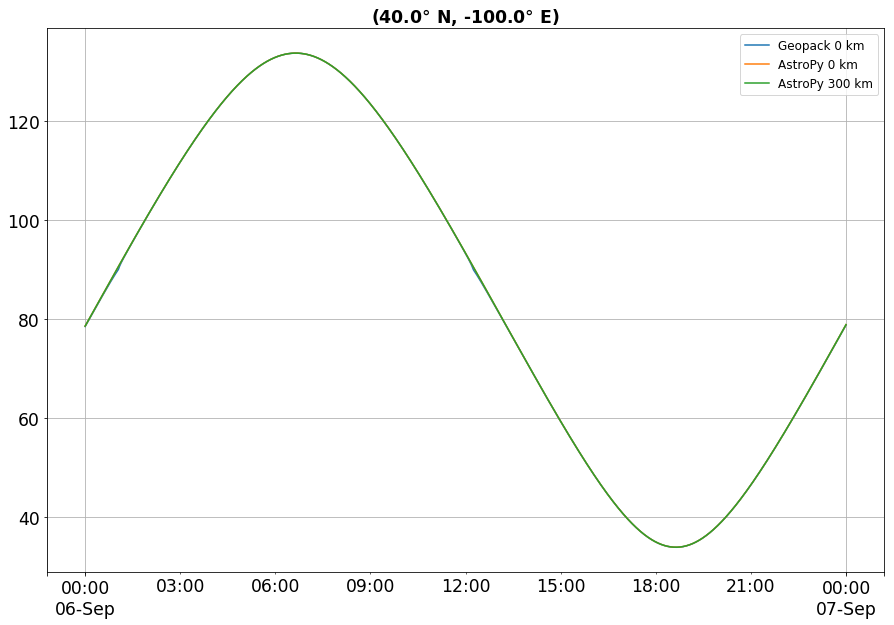

In [3]:
sTime    = datetime.datetime(2017,9,6)
eTime    = datetime.datetime(2017,9,7)
sz       = SolarZenith(sTime,eTime)
sz.calc_geopack()
sz.calc_astropy(0)
sz.calc_astropy(300)
sz.plot()